## 习题 3.4

In [1]:
raw_data <- read.csv("./ex_3_4.csv")
raw_data

催化剂,X.产品得率1,X.产品得率2,X.产品得率3,X.产品得率4,X.产品得率5,X.产品得率6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1,0.88,0.85,0.79,0.86,0.85,0.83
A2,0.87,0.92,0.85,0.83,0.90,0.80
A3,0.84,0.78,0.81,0.80,0.85,0.83
A4,0.81,0.86,0.90,0.87,0.78,0.79


为方便后续分析，先将数据处理成 $<A, x>$ 的序对形式：

In [2]:
A = c()
x = c()
for (row in 1:nrow(raw_data)) {
    for (col in 2:ncol(raw_data)) {
        A = c(A, raw_data[row, 1])
        x = c(x, raw_data[row, col])
    }
}
data = data.frame(A, x)
data

A,x
<chr>,<dbl>
A1,0.88
A1,0.85
A1,0.79
A1,0.86
A1,0.85
A1,0.83
A2,0.87
A2,0.92
A2,0.85


### 正态性检验

首先，第一步，需要对数据进行正态性检验：

用 `shapiro.test` 检验 4 组数据是否服从正态分布：

In [3]:
shapiro.test(x[1:6])
shapiro.test(x[7:12])
shapiro.test(x[13:18])
shapiro.test(x[19:24 ])


	Shapiro-Wilk normality test

data:  x[1:6]
W = 0.92835, p-value = 0.5674



	Shapiro-Wilk normality test

data:  x[7:12]
W = 0.9831, p-value = 0.9659



	Shapiro-Wilk normality test

data:  x[13:18]
W = 0.96579, p-value = 0.8631



	Shapiro-Wilk normality test

data:  x[19:24]
W = 0.92097, p-value = 0.5124


A1、A2、A3、A4 四个组的 shapiro.test 检验 p 值依次为 0.5674、0.9659、0.8631、0.5124，均大于 0.05，
认为原假设成立（$H_0$：假设数据服从正态分布），表明 4 组数据均来自正态分布总体。

### 方差齐次检验

接下来进行方差齐次检验：

用 `bartlett.test` 检验 4 个分组数据方差是否一致：

In [4]:
bartlett.test(x ~ A, data = data)


	Bartlett test of homogeneity of variances

data:  x by A
Bartlett's K-squared = 2.2257, df = 3, p-value = 0.5269


得到 p-value = 0.5269 > 0.05，认为原假设成立（$H_0$：假设 4 组数据方差相等），表明 4 组数据的方差齐次。

通过了上面两个检验，下面就可以开始做单因素方差分析了。

### 图形可视化

开始之前，还可以考虑先用箱图观察一下几组数据的分布：

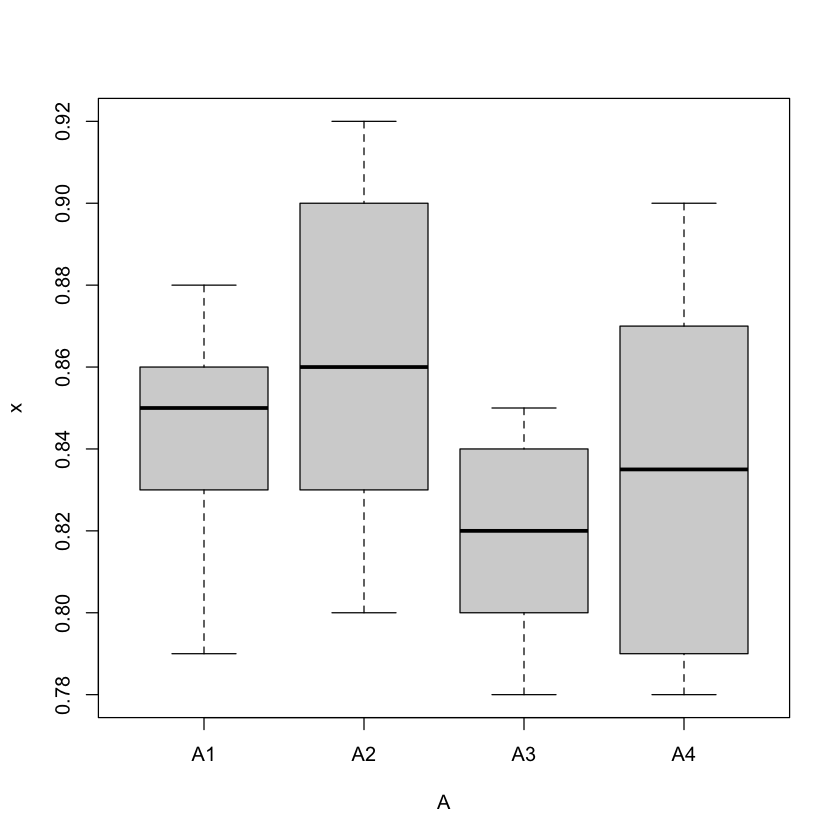

In [5]:
boxplot(x ~ A, data = data)

### 单因素方差分析

使用 aov 函数完成方差分析：

In [6]:
dfc <- aov(x~A, data=data)
summary(dfc)

            Df   Sum Sq  Mean Sq F value Pr(>F)
A            3 0.005846 0.001949   1.306    0.3
Residuals   20 0.029850 0.001492               

从方差分析表中看到 p-value = 0.3 > 0.05，接收原假设 $H_0$，
认为四种不同催化剂对产品的得到率无显著影响

ref: http://www.datasoldier.net/archives/1315